# Занятие 12. Введение в искусственные нейронные сети. Глубокое обучение
К настоящему моменту мы рассмотрели достаточно много способов обучения машины, но ни один из них не выглядел по-настоящему интеллектуально. В своих творческих исканиях было бы логично обратить внимание на архитектуру человеческого мозга. В конце концов природа достаточно часто вдохновляла человека на новые открытия. В этом и заключается суть `искусственных нейронных сетей` (`artificial neuron networks`, `ANN`) $-$ моделей машинного обучения, создатели которых использовали биологические сети нейронов человеческого мозга как пример.

Современному человеку не приходится рассказывать о достоинствах и способностях нейронных сетей, ведь он сам ежедневно пользуется результатом их работы. В этом занятии будем говорить:
* о зарождении идеи искусственных нейронных сетей;
* об архитектуре `персептрона` и `зиме искусственного интеллекта`;
* о многослойном персептроне и `методе обратного распространения ошибки`;
* о проблемах, возникающих при обучении нейронных сетей, и многом другом.

## От биологических к искусственным сетям
Удивительный факт: сети ANN существуют довольно давно. Ещё в 1943 году нейрофизиолог Уоррен Мак-Каллок и математик Уолтер Питт впервые ввели понятия искусственных нейроных сетей. Они представили достаточно простую вычислительную модель совместной работы нейронов с применением `логики высказываний`. Но прежде чем рассмотреть эту модель, обратимся к биологической сети нейронов и разберёмся, из чего она состоит.

### Биологические нейроны
Ниже приведён схематичный рисунок естественной клетки нейрона. Рассмотрим её детально. На рисунке этой необычной клетки можно выделить `тело клетки`, внутри которого находится ядро и большинство сложных компонентов, и разнообразные ветвящиеся компоненты $-$ `дендриты`, $-$ среди которых выделяется одно укрупнённое удлинение, которое называется `аксоном`. C помощью дендритов и находящихся на их концах тонких `синапсов` клетки, которые в действительности не соединены, а просто находятся очень близко друг к другу, мгновенно обмениваются электрическими сигналами.
![Схема биологического нейрона](https://studbooks.net/imag_/15/215560/image001.png)
В отдельности нейроны очень просты и незамысловаты, но, объединяясь в крупное сплетение $-$ `нейронную сеть`, $-$ способны производить достаточно сложные действия.
### Искусственные нейроны
В свою очередь, Мак-Каллок и Питс предложили упрощённую модель `искусственного нейрона`: он имеет от одного двоичного входа (аналог дендритов биологического нейрона, который принимает сигнал вида "включён/выключен") и одного двоичного выхода. Когда активировано больше, чем определённое число входов, нейрон активирует свой выход.

Даже такая упрощённая модель, как показали учёные, способна выполнять разнообразные логические вычисления. Мы можем посмотреть, как искусственные нейроны выполняют вычисления, взглянув на рисунок ниже, где представлены разные простые логические действия, которые вам уже знакомы.

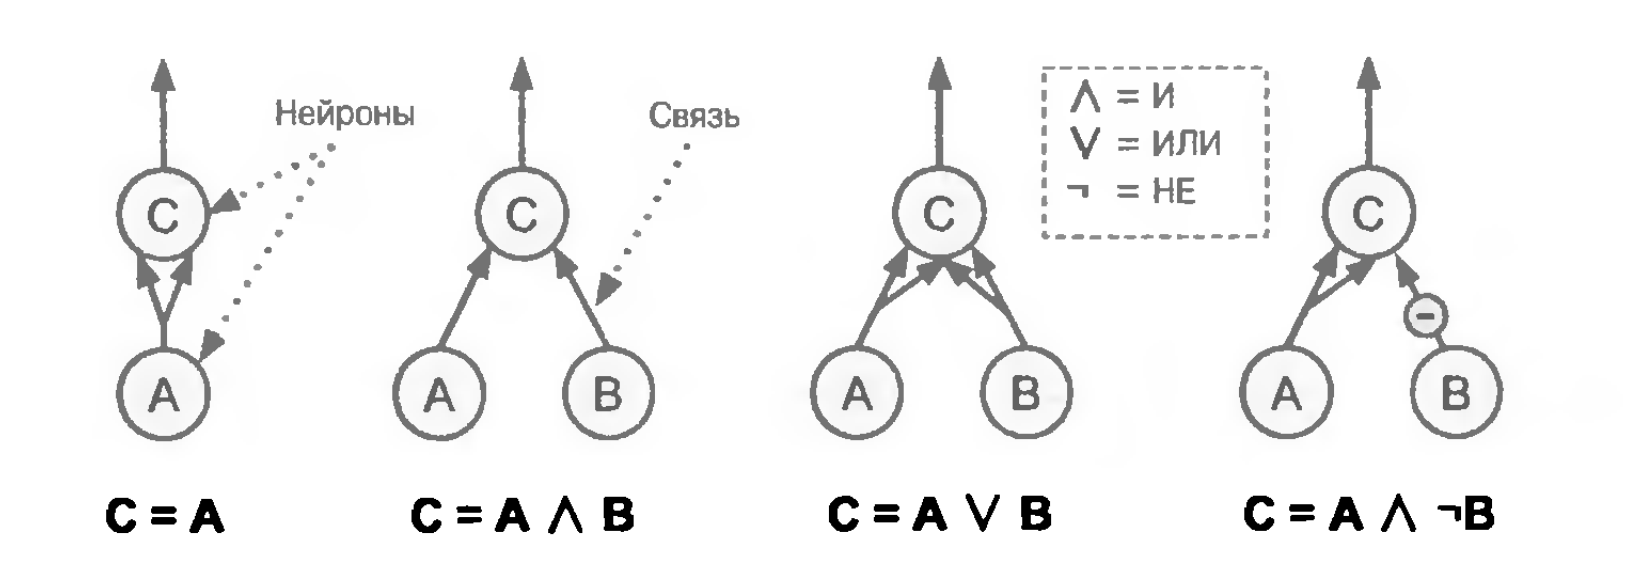

Несложно представить, каким образом такие сети можно комбинировать между собой для вычисления сложных логических выражений.

## Персептрон
С появлением модели ANN одновременно появились и надежды на появление и развитие настоящего `общего искусственного интеллекта (Artificial general intelligence, AGI)` $-$ сильного искусственного интеллекта общего уровня, который способен мыслить и действовать, быть самодостаточным, как человек.

И в 1957 году появилась новая архитектура искусственной нейронной сети, которая основывалась на слегка отличающейся от оригинальной модели Мак-Каллока $-$ Питтса. Сам искусственный нейрон назывался в ней линейным пороговым элементом (`LTU`), входные сигналы "вкл/выкл" были заменены на числа, а каждой связи между нейронами назначался `вес`. Элемент LTU должен был вычислять взвешенную сумму входных сигналов ($z = w_1x_1 + w_2x_2 + ... + w_nx_n = X^TW$, где $x_n$ $-$ входной сигнал в виде числа, $w_n$ $-$ вес связи между нейронами), а затем применяет к ней `ступенчатую функцию` и выдаёт результат: $h_w(x) = step(z)$.

Распространёнными примерами ступенчатой функции являются функция Хевисайда:

$$\begin{equation}
    \begin{matrix}
     heaviside(z)& =
    & \left\{
    \begin{matrix}
    0, & \mbox{если } z < 0 \\
    1,  & \mbox{если } z \geq 0
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

или знаковая функция:

$$\begin{equation}
    \begin{matrix}
     sign(z)& =
    & \left\{
    \begin{matrix}
    -1, & \mbox{если } z < 0 \\
    0, & \mbox{если } z = 0 \\
    +1,  & \mbox{если } z > 0
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

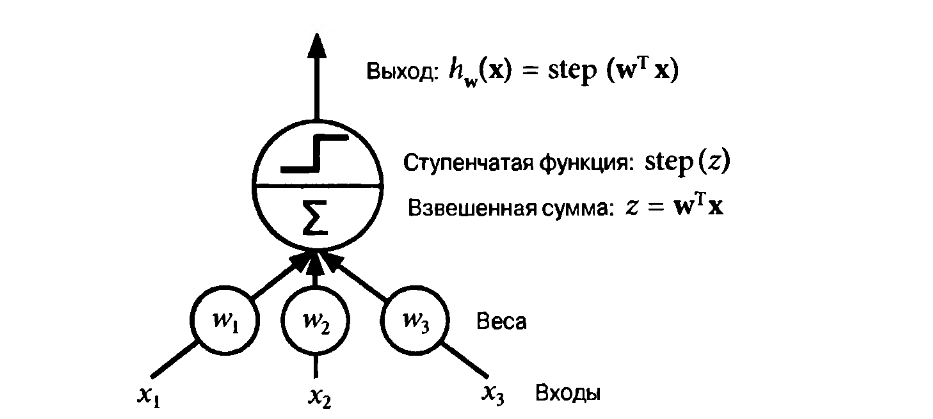

Одиночный элемент LTU может использоваться для простой линейной двоичной классификации, подобно классификатору на основе логистической регрессии). Например, можно было бы применить одиночный элемент LTU для классификации цветков ириса на базе длины и ширины лепестков (добавляя к ним дополнительный признак смещения $x_0 = 1$).

Архитектура, которая состоит из единственного слоя элементов LTU, где каждый элемент LTU соединён со всеми входами, получила название `персептрон` $-$ вероятно, из-за надежд учёных, что именно она поможет компьютеру научиться воспринимать окружающий мир (персептрон $-$ от лат. perceptio $-$ восприятие). Говорят также, что персептрон состоит из `плотного` или `полносвязного` слоя, поскольку так называется слой, где все нейроны соединены с каждым нейроном из предыдущего слоя.

Входы персептрона подаются специальным сквозным нейронам, называемым `входными нейронами`: они передают на выход всё, что было подано на входе. Все входные нейроны формируют `входной слой`. Кроме того, как правило, добавляется дополнительный признак смещения, он обычно представляется с применением нейрона специального типа, называемого `нейроном смещения`, который всё время выдаёт 1.

Ниже показан пример персептрона с двумя входами и тремя выходами. Такой персептрон способен классифицировать образцы одновременно в три разных двочиных класса, что делает его многовыходовым классификатором.

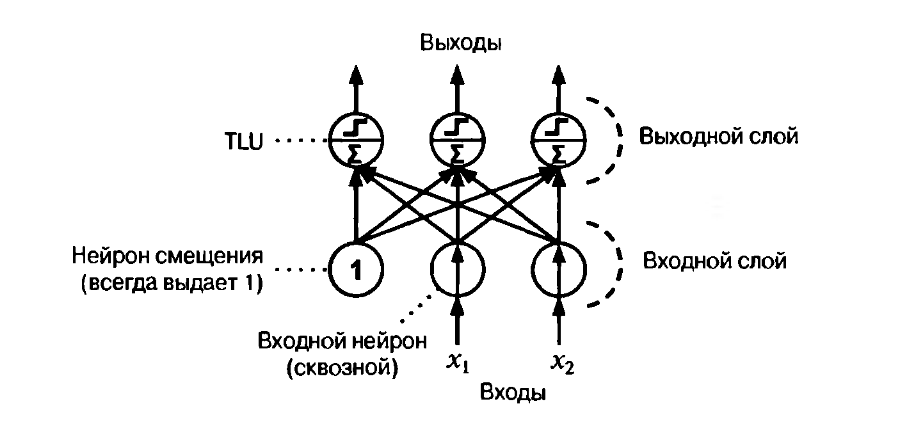

Мы можем посчитать выход полносвязного слоя:
$$h_{W,b}(X) = \phi(XW + b), где:$$ 


$X$ - матрица входных признаков, 

$W$ - матрица весов все связей, кроме нейрона смещения,

$b$ - вектор смещения, который содержит все веса связей между нейроном смещения и искусственными нейронами,

$\phi$ - функция активации.

Как же обучается персептрон? Алгорит обучения, предложенный Розенблаттом, в основном базируется на `правиле Хебба`: когда биологический нейрон часто вызывает срабатывание другого нейрона, связь между этими двумя нейронами усиливается. Другими словами, вес связи между двумя нейронами имеет тенденцию к увеличению, когда они срабатывают одновременно.

Персептроны обучаются с применением варианта этого правила, в котором во внимание принимается ошибка, допущенная сетью, когда она вырабатывает свой прогноз: правило персептрона `укрепляет связи, помогающие сократить ошибку`.

Можно вывести уравнение обучения персептрона:
$$w_{i,j}^{(следующий \,шаг)} = w_{i, j} + \eta(\gamma_j - \hat\gamma_j)x_i, где:$$

$w_{i,j}$ - вес связи между i-ым входным нейроном и j-ым выходным нейроном,

$x_i$ - i-ое входное значение обучающего образца,

$\hat\gamma_j$ - выход j-го нейрона для текущего обучающего образца,

$\gamma_j$ - целевой выход j-го нейрона для текущего образца,

$\eta$ - скорость обучения.

Граница решений каждого выходного нейрона линейна, так что персептроны неспособны к обучению на сложных паттернах. Тем не менее, если обучающие образцы являются линейно сепарабельными, то Розенблатт демонстрирует, что алгоритм сойдётся в некоторое решение. Это называется `теоремой о сходимости персептрона`.

Из-за этого недостатка персептрон не оправдал надежд исследователей, а все проекты по исследованию искусственных нейронных сетей были заморожены: потерялся интерес, а вместе с этим и сократилось финансирование. Наступила `зима искусственного интеллекта`.

## Многослойные персептроны и обратное распространение
Однако исследования всё же продолжались.

Исследователи возлагали надежды на архитектуру `многослойного персептрона` $-$ персептрона, который состоит из одного входного слоя, большого числа слоёв LTU и выходного слоя. Слои, расположенные близко к входному слою, называют `низшими`, а ближе к выходу $-$ `высшими`.

На тот момент сигнал в архитектуре протекал только в одном направлении (от входов к выходам), поэтому многослойный персептрон того времени является примером нейронной сети прямого распространения.

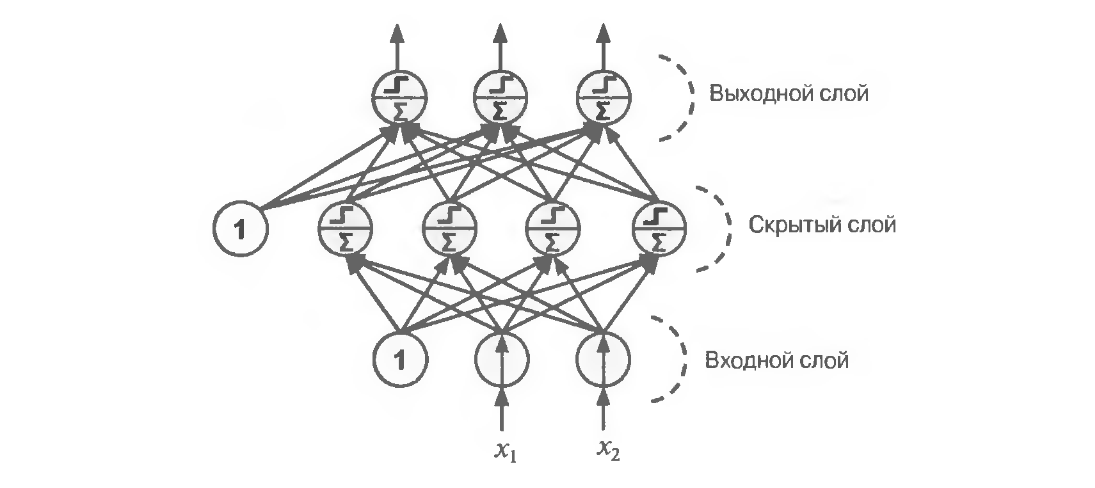

В течение многих лет исследователи старались найти способ обучения многослойных персептронов, но без какого-либо успеха, пока в 1986 году Джеффри Хинтон и Рональд Уильямс не опубликовали статью (по-настоящему революционную), представляющий алгоритм `обучения с обратным распространением`.

Если кратко, то он представляет собой `градиентный спуск, применяющий автоматическое дифференцирование`: всего за два прохода через сеть (один вперёд, другой назад), алгоритм с обратным распространением способен вычислить градиент ошибки сети относительно каждого отдельного параметра модели.

Если более подробно:

* Алгоритм обрабатывает по одному мини-пакету (`batch`) за раз (каждый из них содержит, например, 32 образца) и многократно проходит по полному обучающему набору. Каждый такой проход называется `эпохой (epoch)`.

* Каждый мини-пакет передаётся входному слою сети, который отправляет его первому скрытому слою. Затем алгоритм вычисляет выход всех нейронов в этом слое (для каждого образца в мини-пакете). Результат передаётся следующему слою, его выход вычисляется и передаётся следующему слою $-$ процесс продолжается до тех пор, пока не будет получен выход последнего слоя, выходного. Это `прямой проход`: он похож на выработку прогнозов за исключением того, что все промежуточные результаты сохраняются, поскольку они нужны для обратного прохода.

* Далее алгоритм измеряет выходную ошибку сети (т. е. использует `функцию потерь`, которая сравнивает желаемый выход сети с действительным и возвращает количественный показатель ошибки).

* Следующим он вычисляет размер вклада в ошибку каждой выходной связи. Это делается аналитически за счёт применения `цепного правила`.

* Затем алгоритм измеряет, сколько таких вкладов в ошибку поступает от каждой связи в слое ниже, снова используя цепное правило, и работает в обратном направлении до тех пор, пока не достигнет входного слоя.

* Наконец, алгоритм выполняет шаг градиентного спуска для подстройки всех весов связей в сети с применением только что вычисленных градиентов ошибок.

    При построении многослойного персептрона важно инициализировать веса связей всех скрытых слоёв случайным образом, иначе обучение потерпит неудачу. Например, если вы инициализируете все веса и смещения нулями, тогда все нейроны в заданном слое будут идентичными, и потому обратное распространение повлияет на них совершенно одинаково. Другими словами, невзирая на наличие сотен нейронов на слой, ваша модель будет действовать так, как если бы был только один нейрон на слой: она не окажется слишком интеллектуальной. Если взамен вы инициализируете веса случайным образом, то `нарушите симметрию` и позволите алгоритму с обратным распространением обучаать несходную группу нейронов.

Чтобы алгоритм работал правильно, его авторы внесли ключевое изменение в архитектуру `MLP`: они заменили ступенчатую функцию `логистической (сигмоидальной)` функцией, $\sigma(z) = \frac{1}{1 + e^{-z}}$.

Это было существенным изменением, поскольку ступенчатая функция содержит только плоские сегменты, из-за чего градиентный спуск не работал $-$ он просто не в состоянии перемещается по плоскости.

На самом деле алгоритм с обратным распространением ошибки хорошо работает и с многими другими функциями активации. Просто биологические нейроны, по-видимому, реализуют примерно сигмоидальную (S-образную) функцию активации и потому исследователи упорно и долго придерживались логистической функции. Но оказалось, что она далеко не идеальна для сетей ANN, как мы увидим далее. Это один из случаев, когда биологическая аналогия вводила в заблуждение.

Какие ещё могут быть функции активации для MLP:
* функция гиперболического тангенса: $$tanh(z) = 2\sigma(2z) - 1$$, которая является S-образной, непрерывной и дифференцируемой, но её выходное значение находится в диапазоне от -1 до 1 (а не от 0 до 1, как в случае логистической функции). Такой диапазон имеет тенденцию делать выход каждого слоя более или менее центрированным вокруг 0 в начале обучения, что часто помогает ускорить сходимость.

* функция выпрямленного линейного элемента (ReLU): $$ReLU(z) = max(0, z)$$, которая является непрерывной, но не дифференцируемой в точке $z = 0$ (наклон резко меняется, что может привести к колебаниям градиентного спуска вокруг), тем не менее, на практике эта функция работает очень хорошо и обладает преимуществом более быстрого вычисления, так что она стала стандартным вариантом.

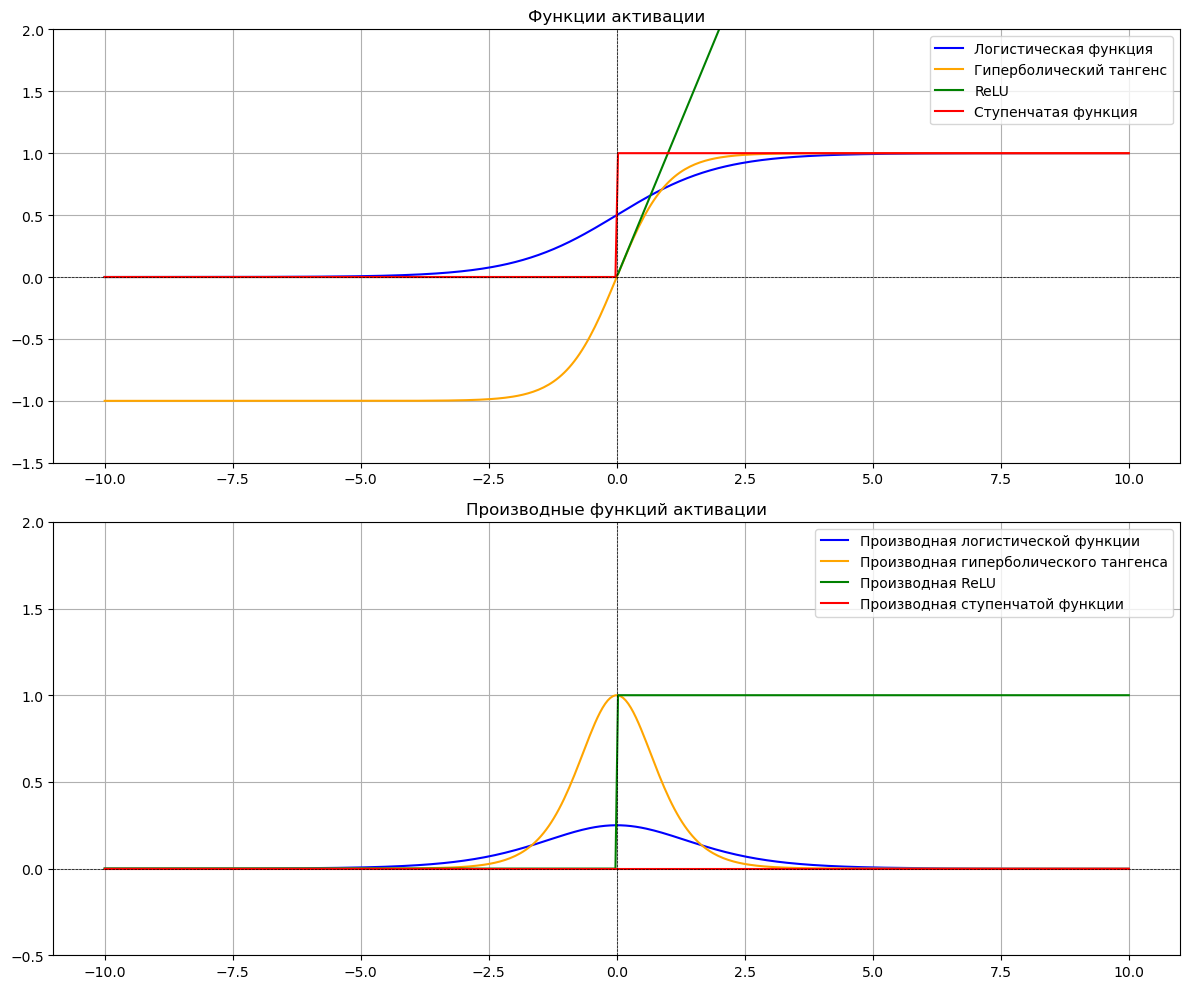

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)

# Логистическая функция
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Гиперболический тангенс
def tanh(x):
    return np.tanh(x)

# ReLU функция
def relu(x):
    return np.maximum(0, x)

# Ступенчатая функция
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Производные
def logistic_derivative(x):
    fx = logistic(x)
    return fx * (1 - fx)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def step_function_derivative(x):
    return np.zeros_like(x)

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.title("Функции активации")
plt.plot(x, logistic(x), label='Логистическая функция', color='blue')
plt.plot(x, tanh(x), label='Гиперболический тангенс', color='orange')
plt.plot(x, relu(x), label='ReLU', color='green')
plt.plot(x, step_function(x), label='Ступенчатая функция', color='red')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.ylim(-1.5, 2)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Производные функций активации")
plt.plot(x, logistic_derivative(x), label='Производная логистической функции', color='blue')
plt.plot(x, tanh_derivative(x), label='Производная гиперболического тангенса', color='orange')
plt.plot(x, relu_derivative(x), label='Производная ReLU', color='green')
plt.plot(x, step_function_derivative(x), label='Производная ступенчатой функции', color='red')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.ylim(-0.5, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### MLP для регрессии
Многослойные персептроны можно использовать для задач регрессии. Если вы хотите прогнозировать одиночное значение (скажем, стоимость дома, располагая множеством его признаков), тогда вам понадобится единственный `выходной` нейрон: его выходом будет спрогнозированное значение. 

Для `многомерной регрессии` (т.е. для прогнозирования множества значений за раз) вам необходим один нейрон на измерение выхода. Например, чтобы найти центр объекта в изображении, нужно спрогнозировать двумерные координаты, а потому потребуется два выходных нейрона. Если вы также хотите поместить ограничивающий прямоугольник вокруг объекта, то вам понадобятся ещё два числа: ширина и высота объекта. В итоге получается четыре выходных нейрона.

Если вы желаете гарантировать, что выход всегда будет положительным, тогда можете использовать в выходном слое функцию активации ReLU.

|Гиперпараметр| Типичное значение|
|-|-|
|Количество входных нейронов|1 на входной признак (например, 28 * 28 = 784 для MNIST|
|Количество скрытых слоёв|Зависит от задачи, но обычно от 1 до 5|
|Количество нейронов на скрытый слой|Зависит от задачи, но обычно от 10 до 100|
|Количество выходных нейронов|1 на измерение прогноза|
|Активация скрытых слоёв|Отсутствует либо ReLU|
|Функция потерь|MSE или MAE/Хьюбера|

### MLP для классификации
Многослойные персептроны также могут применяться при решении задач классификации.

Для задачи двоичной классификации вам необходим лишь один выходной нейрон, использующий логистическую функцию активации: выходом будет число между 0 и 1, которое вы можете интерпретировать как оценку вероятности положительного класса. Оценка вероятности отрицательного класса равна единице минус это число.

Многослойные персептроны также способны легко решать задачи `многозначной двоичной классификации`. Например, вы бы могли построить систему классификации почтовых сообщений, которая прогнозирует, является ли входящее сообщение спамом, и одновременно выдаёт прогноз, срочное оно или несрочное. В такой ситуации вам потребовалось бы два выходных нейрона, в которых применяется логистическая функция активации: первый выдавал бы вероятность того, что сообщение представляет собой спам, а второй $-$ вероятность того, что оно срочное. 

В более общем случае вы выделили бы по одному выходному нейрону на каждый положительный класс. Обратите внимание, что выходные вероятности не обязательно дают в сумме 1. Это позволяет модели выдавать любые комбинации меток: вы можете иметь несрочный спам, несрочный не спам и, может быть, даже срочный спам (хотя это больше похоже на ошибку).

Если каждый образец может принадлежать только одному из трёх и более возможных классов (скажем, от 0 до 9 при классификации MNIST), тогда нужно предусмотреть по одному выходному нейрону на класс и использовать `многопеременную (softmax)` функцию активации для всего выходного слоя. Многопеременная функция активации обеспечит нахождение всех оценок вероятности между 0 и 1, а также то, что в сумме они дадут 1 (это обязательно, если классы взаимоисключающие). Задача называется `многоклассовой классификацией`.

Что касается функции потерь, то поскольку мы прогнозируем распределения вероятностей, потеря в виде `перекрёстной энтропии` (`логарифмическая потеря`) будет хорошим выбором.

|Гиперпараметр| Двоичная классификация|Многозначная двоичная классификация|Многоклассовая классификация|
|-|-|-|-|
|Входной слой и скрытые слои|Такие же, как при регрессии|Такие же, как при регрессии|Такие же, как при регрессии|
|Количество выходных нейронов|1|1 на метку|1 на класс|
|Активация выходного слоя|Логистическая|Логистическая|Многопеременная|
|Функция потерь|Перекрёстная энтропия|Перекрёстная энтропия|Перекрёстная энтропия|

## Проблемы обучения глубоких нейронных сетей

`Глубокой нейронной сетью` обычно называют искусственную нейронную сеть с большим количеством скрытых слоёв. Обучить такую сеть, в которой каждый слой содержит сотни нейронов, соединённых сотнями тысяч связей, достаточно трудно $-$ это не будет простой прогулкой по парку. 

С какими проблемами можно столкнуться при обучении:
* невероятно коварная проблема `исчезающих градиентов` или связанная с ней проблема `взрывных градиентов`: ситуация такова, что градиенты становятся меньше или всё больше и больше, когда протекают обратно через глубокую сеть во время обучения $-$ обе проблемы делают самые нижние слои весьма трудными в обучении;
* у вас может быть недостаточно данных для обучения такой крупной сети;
* обучение может быть чрезвычайно медленным;
* модель с миллионами параметров подвержена риску переобучения набором, особенно если обучающих образцов недостаточно или они крайне зашумлены.

Рассмотрим эти проблемы более подробно.
### Проблемы нестабильных градиентов
Как говорилось выше, алгоритм с обратным распространением (буду для краткости иногда писать его английский вариант названия `backpropagation`) работает, двигаясь от выходного слоя к входному слою и попутно распространяя градиет ошибок. После того, как алгоритм вычислил градиент функции издержек относительно каждого параметра сети, он использует эти градиенты для обновления каждого параметра посредством шага градиентного спуска. 

К сожалению, с продвижением алгоритма к более низким слоям градиенты зачастую становятся всё меньше и меньше. В результате градиентный спуск оставляет веса связей нижних слоёв практически неизменными и обучение никогда не сходится в хорошее решение. Исследователи называют это проблемой `исчезающих градиентов`. В ряде случаев может произойти противоположное: градиенты способны расти всё больше и больше до тех пор, пока слои не получат безумно высокие обновления весов $-$ и алгоритм расходится. Эта проблема называется проблемой `взрывного роста градиентов`. 

В целом глубокие сети страдают от нестабильных градиентов, разные слои могут обучаться с широко варьирующимися скоростями. И такое поведение эмпирически наблюдалось давно, из-за чего от нейронных сетей обычно отказывались в начале 2000-х годов. Было непонятно, что служило причиной нестабильности градиентов при обучении, но кое-что прояснилось в статье 2010 года, написанной учёными Ксавье Глоро и Йошуа Бенджи. Они обнаружили несколько причин, среди которых было сочетание популярной на тот момент логистической функции активации и методики инициализации весов из нормального распределения со средним 0 и стандартным отклонением 1. Выражаясь кратко, они показали, что с такой функцией активации и схемой инициализации дисперсия выходов каждого слоя намного больше дисперсии его входов. С продвижением вперёд по сети дисперсия продолжает увеличиваться после каждого слоя до тех пор, пока функция активации не `насыщается` в верхних слоях.

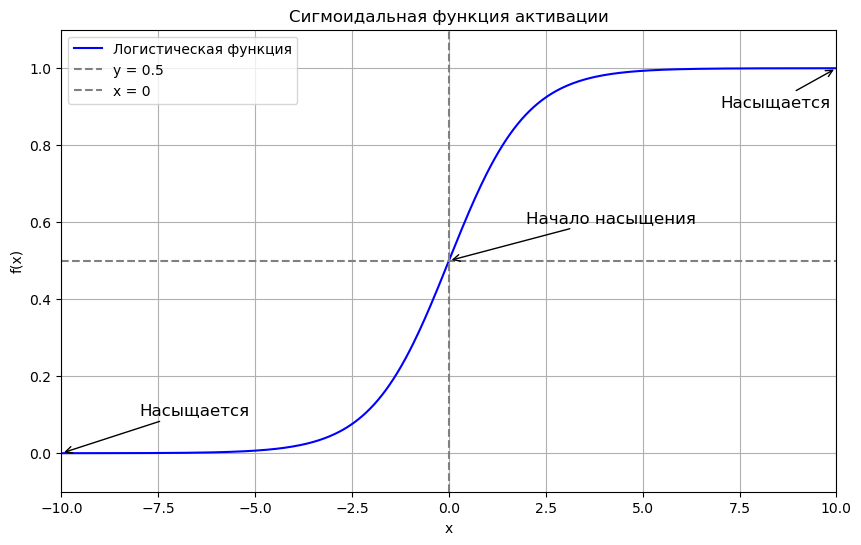

In [4]:
x = np.linspace(-10, 10, 400)
y = logistic(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Логистическая функция', color='blue')

plt.axhline(y=0.5, color='gray', linestyle='--', label='y = 0.5')
plt.axvline(x=0, color='gray', linestyle='--', label='x = 0')

plt.annotate('Начало насыщения', xy=(0, 0.5), xytext=(2, 0.6),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.annotate('Насыщается', xy=(-10, 0), xytext=(-8, 0.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12)

plt.annotate('Насыщается', xy=(10, 1), xytext=(7, 0.9),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12)

plt.title('Сигмоидальная функция активации')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-0.1, 1.1)
plt.xlim(-10, 10)
plt.grid()
plt.legend()
plt.show()среднее

Глоро и Бенджи в своей статье предложили способ значительного смягчения проблемы нестабильных градиентов. Они доказали, что для надлежащего протекания сигнала нужно, чтобы дисперсия выходов каждого слоя была равна дисперсии его входов, и необходимо, чтобы градиенты имели равную дисперсию до и после протекания через слой в обратном направлении. Конечно, соблюдение всех условий трудно (или невозможно), если только речь не идёт о слое с одинаковым количеством входов и нейронов (такие количества называются `коэффициентом разветвления по входу (fan-in)` и `коэффициентом разветвления по выходу (fan-out)` слоя). Но Глоро и Бенджи предложили хороший компромисс, который доказал свою эффективность на практике: веса связей каждого слоя должны быть инициализированы случайным образом, как описано в уравнении ниже.

$$\sigma^2 = \frac{1}{fan_{среднее}}$$

На основе этого открытия были созданы разные модификации распределения весов для слоёв глубоких нейронных сетей. Ниже приведена таблица с комбинациями инициализаций весов и функций активации.

|Инициализация| Функция активации|$\sigma^2$(нормальное распределение)|
|-|-|-|
|Глоро|Отсутствует, гиперболический тангенс, логистическая, softmax|$\frac{1}{fan_{среднее}}$|
|Хе|ReLU и разновидности|$\frac{2}{fan_{выхода}}$|
|Лекуна|SELU|$\frac{1}{fan_{входа}}$|

#### Ненасыщаемые функции активации
Авторы статьи также выдвинули идею, что проблемы нестабильных градиентов возникают из-за неудачно выбранной функции активации. Как говорилось чуть выше, биологически нейроны используют что-то похожее на сигмоидальные функции активации, поэтому исследователи продолжали активно применять логистическую функцию и в искусственных сетях. Однако, как оказалось, функция `ReLU` в ANN ведёт себя лучше, потому что она не насыщается для положительных значений (и оттого, что её быстро вычислять).

Однако даже она не идеальна и страдает от проблемы, известной как `угасающие элементы ReLU`: во время обучения некоторые нейроны фактически "отмирают", т. е. перестают выдавать что-то, отличающееся от 0. Вы можете обнаружить, что половина нейронов вашей сети погибла, особенно если применяется большая скорость обучения. Нейрон отмирает, когда его веса модифицируются так, что его взвешенная сумма входов оказывается отрицательной для всех образцов в обучающем наборе.  Как только это произошло $-$ он просто продолжает выдавать нули и градиентный спуск на него не влияет.

Для решения этой проблемы вы можете воспользоваться модификацией ReLU, которая называется `ReLU с утечкой` ($ReLU = max(\alpha z, z)$). Гиперпараметр $\alpha$ задаёт размер "утечки" функции: это наклон функции для $z < 0$, и он обычно устанавливается в 0.01. На основе этой модификации были придуманы различные вариации, в частности `ELU` (<a href=https://pytorch.org/docs/stable/generated/torch.nn.ELU.html>экспоненциальный линейный элемент</a>) и `SELU` (<a href=https://pytorch.org/docs/stable/generated/torch.nn.SELU.html>масштабированный экспоненциальный линейный элемент</a>).

При выборе функции активации ориентируйтесь на это соотношение: $$SELU > ELU > ReLU\, с\, утечкой > ReLU > tanh > логистическая\,функция$$

#### Пакетная нормализация
Несмотря на то что использование инициализации Хе вместе с ELU (или любой разновидностью ReLU) может значительно уменьшить проблемы нестабильности градиентов в начале обучения, нет никакой гарантии, что во время обучения проблемы не возникнут снова.

В статье 2015 года Сергей Иоффе и Кристиан Сегеди предложили методику, которая решает проблемы исчезновения/взрывных градиентов. Модель предусматривает добавление в модель операции прямо перед или сразу после функции активации каждого скрытого слоя. Операция просто центрирует относительно нуля и нормализует каждый вход, а затем масштабирует и сдвигает результат с применением двух новых векторов параметров на один слой. Методика называется `пакетной нормализацией` и математически описывается ниже:

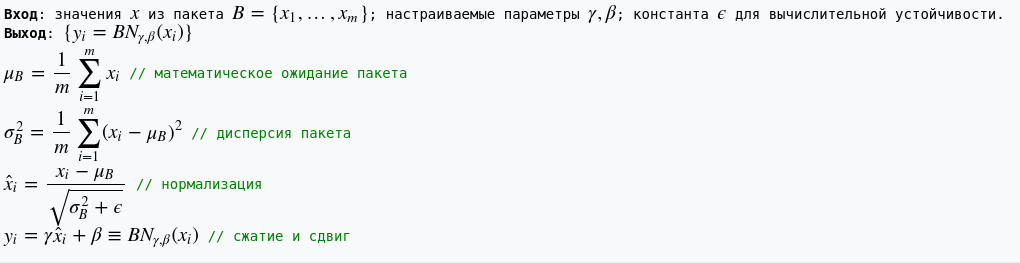

Если вы добавляете слой пакетной нормализации в качестве самого первого слоя нейронной сети, то не нуждаетесь в стандартизации своего обучающего набора (например, используя `StandardScaler`). 

### Медленное обучение
Обучение очень больших глубоких нейронных сетей может быть мучительно медленным. Выше рассмотренные методики могут помочь сократить время обучения сети, но ещё один гигантский скачок скорости обеспечивает применение более быстрого `оптимизатора`, чем обыкновенный оптимизатор на основе градиентного спуска.
#### Моментная оптимизация
Вообразите большой мяч, катящийся по гладкой поверхности с пологим уклоном: он начинает движение медленно, но быстро накопит кинетическую энергию, пока в итоге не достигнет конечной скорости. Такая совершенно простая идея лежит в основе `моментной оптимизации`, предложенной Борисом Поляком в 1964 году. Напротив, обыкновенный градиентный спуск будет делать небольшие постоянные шаги вдоль уклона, поэтому для достижения низа ему потребуется больше времени.

Градиентный спуск просто обновляет веса $W$ путём прямого вычитания градиента функции издержек $J(W)$ относительно весов ($\nabla_WJ(W)$), умноженного на скорость обучения $\eta$. Он не заботится о том, какими были начальные градиенты. Если локальный градиент очень маленький, тогда процесс продвигается крайне медленно.

Моментная оптимизация принимает во внимание предыдущие градиенты: на каждой итерации локальные градиенты вычитаются из `вектора момента` $m$, умноженного на скорость обучения $\eta$, а веса обновляются добавлением этого вектора момента. Другими словами, градиенты используются для ускорения, а не для скорости. Чтобы эмулировать механизм трения какого-то вида и предотвратить слишком сильный рост момента, в алгоритме вводится новый гиперпараметр $\beta$, называемый моментом, который должен быть установлен межжду 0 (высокое трение) и 1 (отсутствие трения).

На основе этой оптимизации есть вариация, которая называется `ускоренным градиентом Нестерова`, предложенная Юрием Нестеровым в 1983 году. Она почти всегда быстрее обыкновенной моментной оптимизации и измеряет градиент функции издержек не в локальной позиции W, а чуть подальше в направлении момента, в точке $W+\beta m$. Такая подстройка позволяет оказаться чуть ближе к оптимуму и быть точнее.

#### AdaGrad
Снова рассмотрим проблему с мячом, катящимся по пологому склону. Градиентный спуск начинает с быстрого движени явниз по самому крутому уклону, который не указывает прямо в направлени глобального оптимума, а затем очень медленно перемещается в нижнюю точку впадины. Было бы неплохо, если бы алгоритм мог пораньше скорректировать своё направление к точке, более близкой к глобальному оптимуму. Алгоритм `AdaGrad` обеспечивает такую коррекцию, пропорционально уменьшая вектор-градиент вдоль самых крутых направлений.

Выражаяь кратко, алгоритм ослабляет скорость обучения, но для крутых измерений делает это быстрее, чем для измерений с более пологими уклонами. Получается то, что называется `адаптивной скоростью обучения`.

Алгоритм AdaGrad при обучении нейронных сетей останавливается слишком рано. Скорость обучения сокращается настолько, что алгоритм полностью прекращает работу до достижения глобального оптимума, поэтому лучше не применять его для обучения глубоких нейронных сетей.

На его основе существует другой алгоритм `RMSProp`, который устраняет эту проблему. Решение заключается в том, чтобы накапливать только градиенты из самых последних итераций в противоположность накоплению всех градиентов с начала обучения. Реализация имеет `коэффициент ослабления` $\beta$, который обычно устанавливается в 0.9.

#### Adam и Nadam
Оптимизация `Adam` (adaptive moment estimation $-$ адаптивная оценка момента) объединяет идеи моментной оптимизации и RMSProp: как и моментная оптимизация, она отслеживает экспоненциально ослабляемое среднее арифметическое прошедших градиентов и, подобно RMSProp, она отслеживает экспоненциально ослабляемое среднее арифметическое квадратов прошедших градиентов.

Алгоритм имеет два гиперпараметра: коэффициент ослабления момента $\beta_1$ и коэффициент ослабления масштаба $\beta_2$. Первый инициализируется значением 0.9, а второй $-$ 0.999.

На основе этого алгоритма существует несколько вариаций, среди которых выделяется алгоритм `Nadam`. По сути, это реализация Adam плюс трюк Нестерова, из-за чего алгоритм будет сходиться быстрее, чем обычный Adam.

### Переобучение и регуляризация
#### Регуляризация $l_1$ и $l_2$
Подобно тому, как это делалось в лекции про линейную регрессию, мы можем использовать регуляризацию $l_2$ (вспомните гребневую (ridge) регрессию) для ограничения весов связей нейронной сети и/или регуляризацию $l_1$ (а теперь вспомните лассо-регрессию), если нужна `разряженная модель`(со многими весами, равными 0). 
#### Отключение
`Отключение` (dropout) является одним из наиболее популярных методик регуляризации для глубоких нейронных сетей. Алгоритм довольно прост: на каждом шаге обучения каждый нейрон (включая входные, но всегда исключая выходные нейроны) имеет вероятность $p$ быть временно "отключённым", так что он будет полностью игнорироваться в течение этого шага обучения, но может стать активным во время следующего шага. Гиперпараметр $p$ называется `долей отключения` (`dropout rate`) и обычно устанавливается между 10% и 50%. После обучения нейроны `больше не отключаются`.

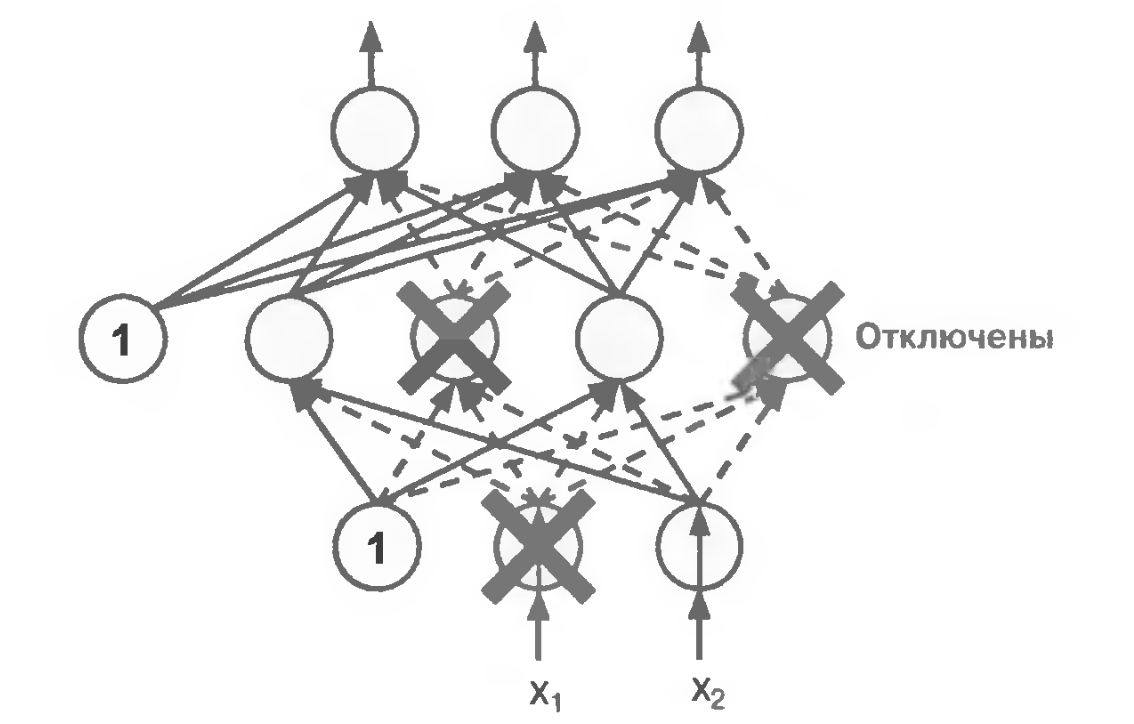

# Упражнения
1. Выполнить первую часть практического задания, в котором вы поупражняетесь в построении полносвязных линейных сетей с помощью модуля `torch`;
2. Выполните вторую часть практического задания, в котором вы реализуете архитектуру Wide&Deep для системы рекомендации.